In [176]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [177]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [178]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Возьмем один ряд без ярко выраженной сезонности и один сезонный ряд 

## Ряд weekly-sales-of-a-cutting-tool

In [179]:
series = pd.read_csv('weekly-sales-of-a-cutting-tool-p.csv').iloc[:, -1]

Results of Dickey-Fuller Test:
Test Statistic                 -1.715607
p-value                         0.423090
#Lags Used                      2.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


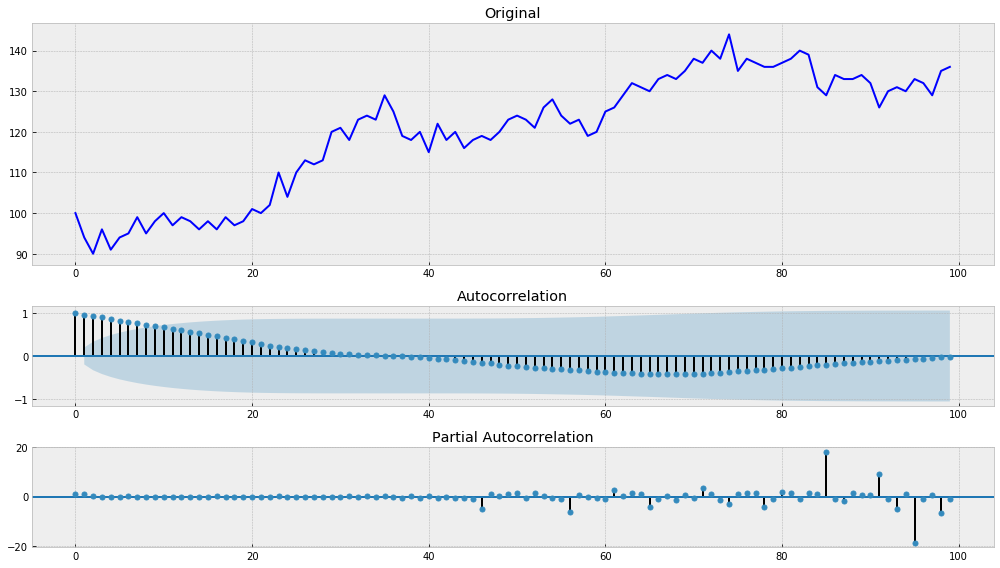

In [180]:
tsplot(series)

Уменьшим разброс дисперсии при помощи преобразования Бокса-Кокса

In [181]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -1.751292
p-value                         0.404897
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


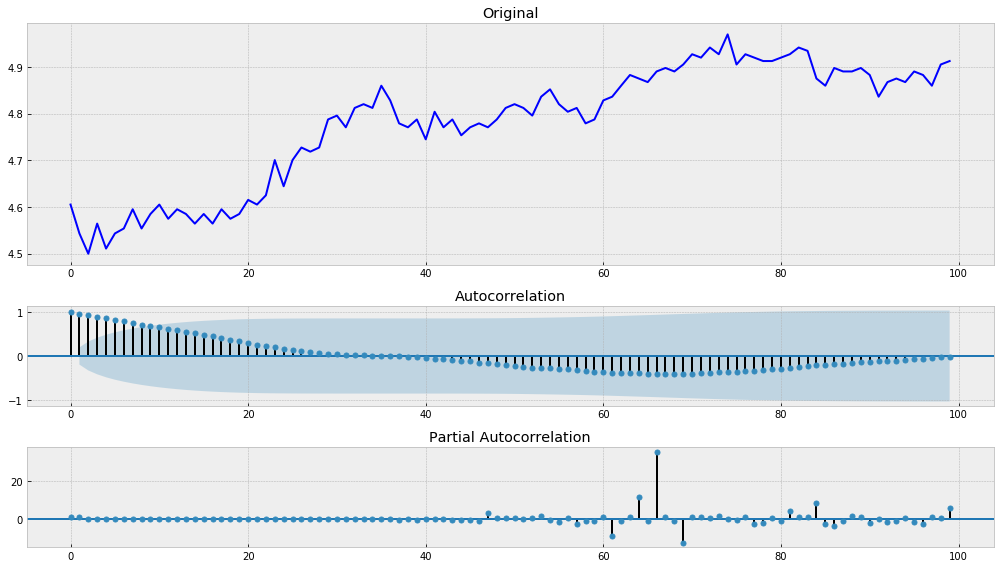

In [182]:
tsplot(series)

Применим дифференцирование.

In [183]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -2.847104
p-value                         0.051854
#Lags Used                      6.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


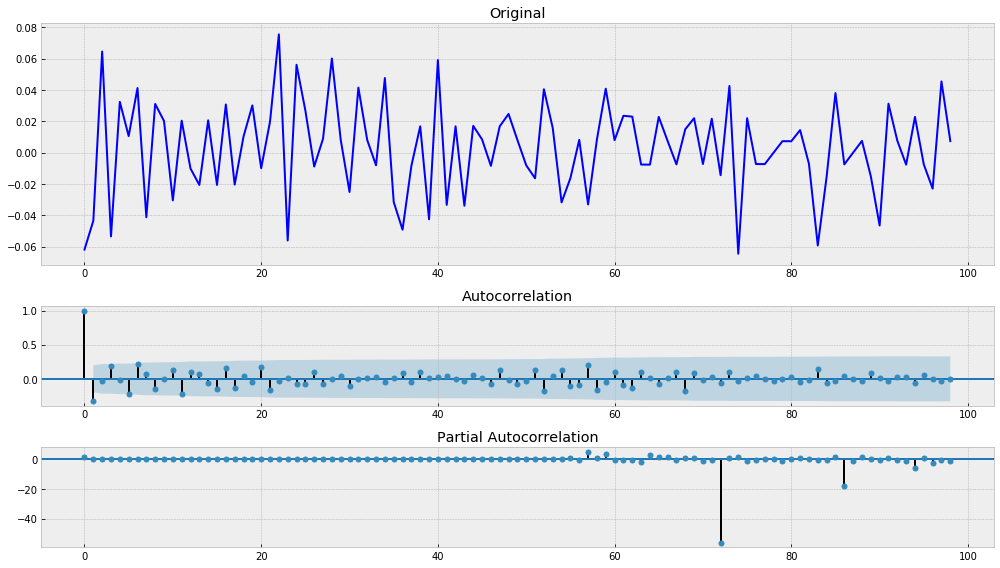

In [184]:
tsplot(series)

Применим повторное дифференцирование

In [185]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -8.468379e+00
p-value                        1.500792e-13
#Lags Used                     5.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


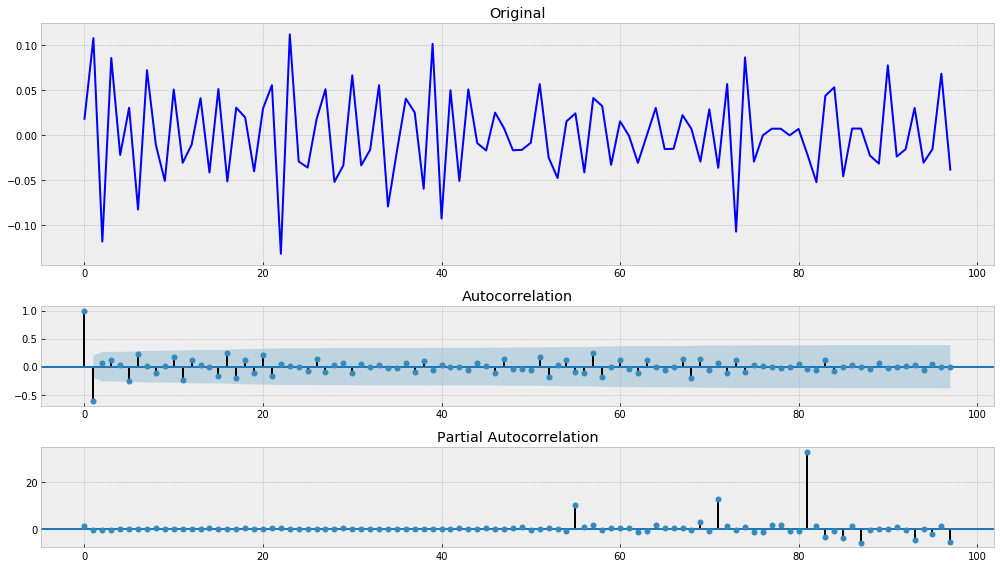

In [186]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда

## Ряд ozone-concentration

In [187]:
series = pd.read_csv('ozone-concentration-azusa-195619.csv').iloc[:, -1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.864747
p-value                          0.049604
#Lags Used                      11.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


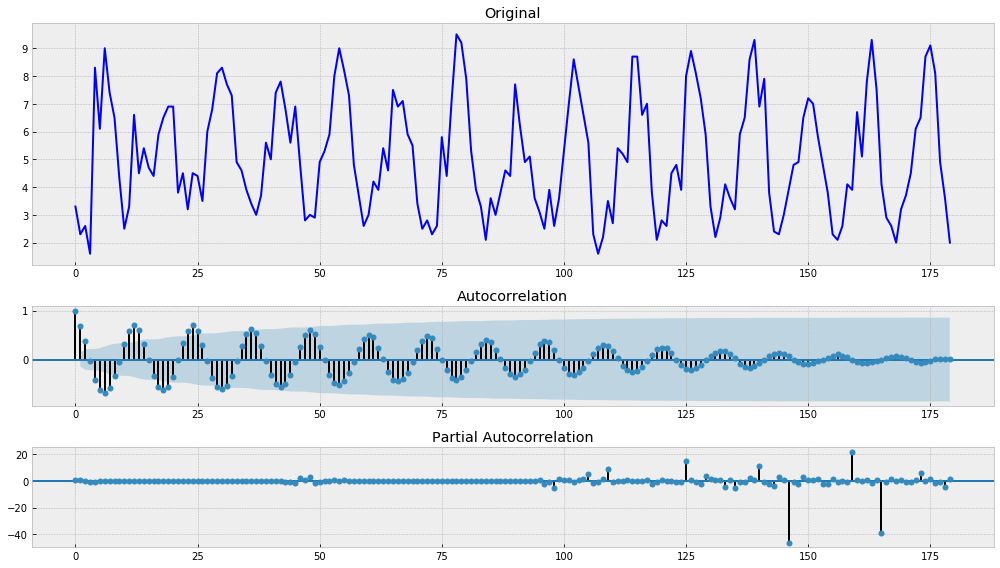

In [188]:
tsplot(series)

Уменьшим разброс дисперсии при помощи преобразования Бокса-Кокса

In [189]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.742697
p-value                          0.066937
#Lags Used                      11.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


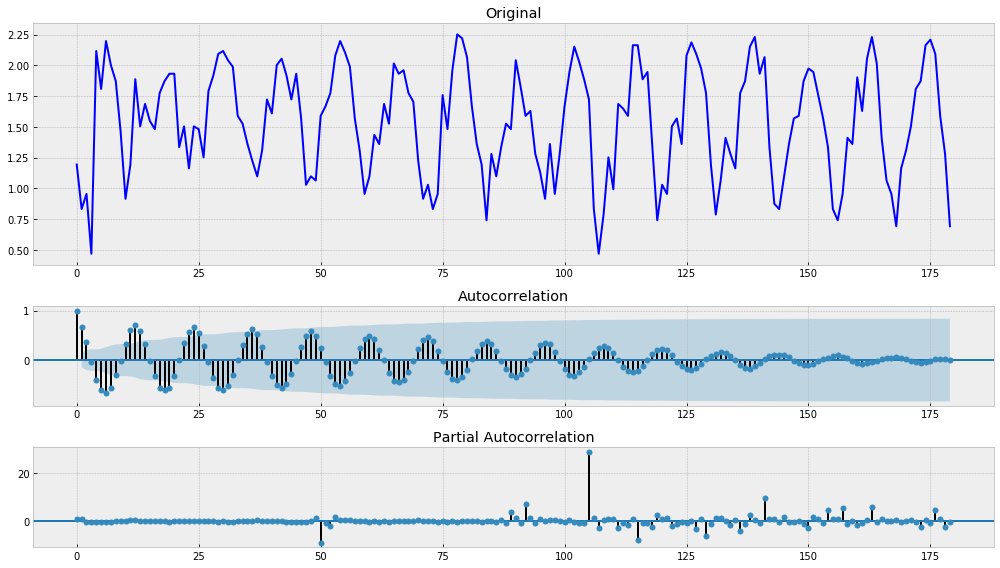

In [190]:
tsplot(series)

Применим дифференцирование

In [191]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.293663e+01
p-value                        3.606386e-24
#Lags Used                     1.000000e+01
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (5%)           -2.878903e+00
Critical Value (10%)          -2.576027e+00
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


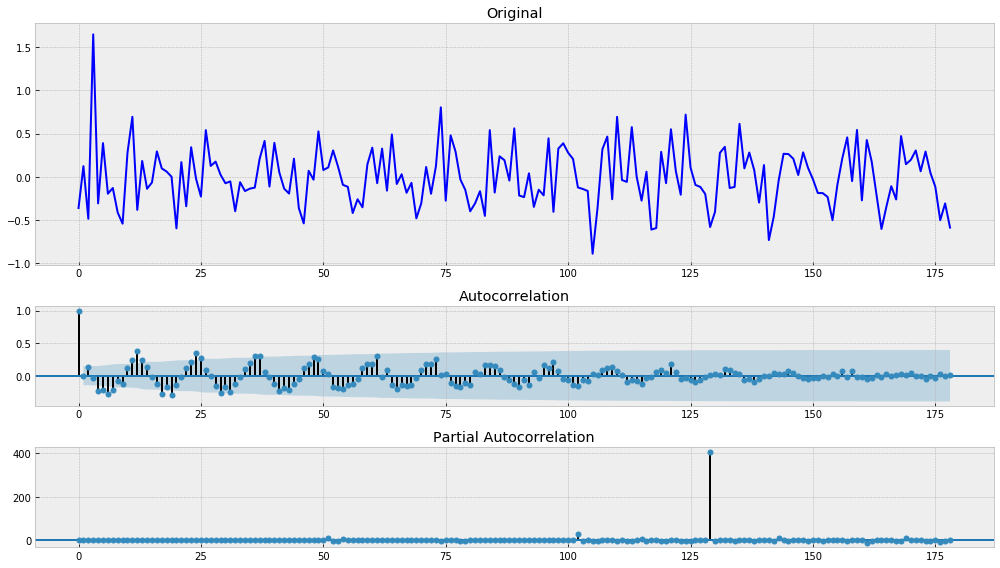

In [192]:
tsplot(series)

тест Дики-Фуллера  отвергает гипотезу о нестационарности ряда, но графики коррелограмм говорят о сезонности.
применим сезонное дифференцирование

In [193]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.519108e+00
p-value                        1.053041e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.520000e+02
Critical Value (1%)           -3.474121e+00
Critical Value (5%)           -2.880750e+00
Critical Value (10%)          -2.577013e+00
dtype: float64


/home/max/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


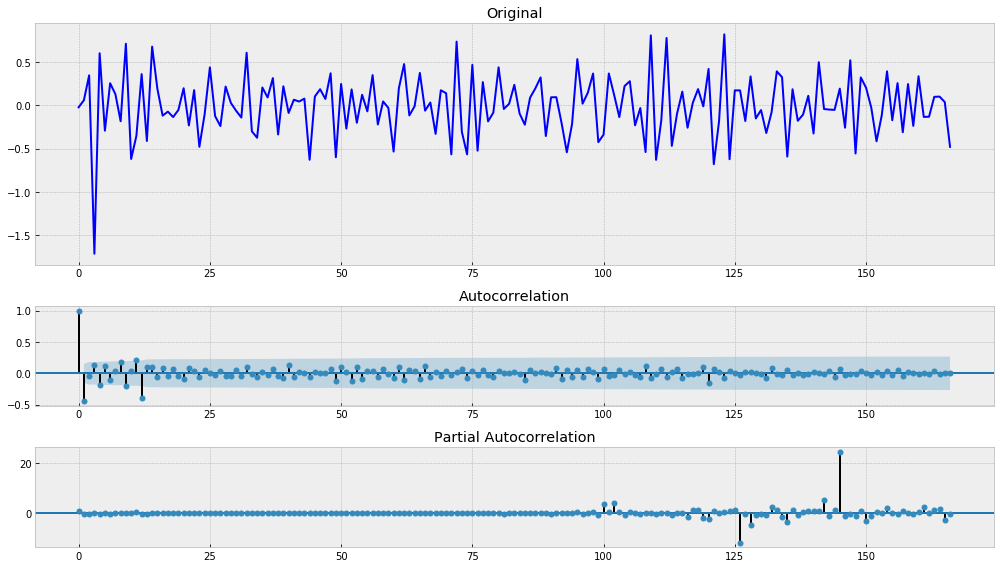

In [194]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда